In [1]:
import pandas as pd
df = pd.read_csv('dati.csv')

In [2]:
#Si richiede di verificare le dimensioni del dataset
num_righe, num_colonne = df.shape
print("Numero di righe:", num_righe)
print("Numero di colonne:", num_colonne)

Numero di righe: 387249
Numero di colonne: 67


In [3]:
#Si richiede di visualizzare i metadati
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387249 entries, 0 to 387248
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387249 non-null  object 
 1   continent                                   368722 non-null  object 
 2   location                                    387249 non-null  object 
 3   date                                        387249 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente (ho scelto di calcolare i new cases per non avere i dati cumulativi dei total cases), escludendo i valori che non appartengono ad alcun continente

#per prima cosa esludiamo i valori nulli dal df
df = df.dropna(subset=['continent'])

#poi raggruppiamo i dati dei new cases per ciascun continente e facciamo la somma
casi_per_continente = df.groupby('continent')['new_cases'].sum()

print("Numero di casi per continente:")
print(casi_per_continente)

Numero di casi per continente:
continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64


In [5]:
#Si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

#definiamo una funzione che prenda in considerazione il dataset e un continente
def cfr_statistiche(dataset, continente):

#sostituiamo i valori nulli con '0'
    continenti = ['continent']
    dataset[continenti] = dataset[continenti].fillna(0)
    
#filtriamo il dataset
    dataset_continente = dataset[dataset['continent'] == continente]

#calcoliamo i dati statistici richiesti (max  e media rispetto al numero dei casi totali) di un continente
    massimo = dataset_continente['new_cases'].max()
    media = dataset_continente['new_cases'].mean()

#calcoliamo il numero totale di casi nel mondo per poi ricavare la % di casi per continente
    nuovi_casi_mondo = dataset['new_cases'].sum()
    
    percentuale = (dataset_continente['new_cases'].sum() / nuovi_casi_mondo) * 100

#risultati
    print(f"Massimo dei nuovi casi in {continente}: {massimo}")
    print(f"Media dei nuovi casi in {continente}: {media}")
    print(f"Percentuale dei nuovi casi in {continente} rispetto al mondo: {percentuale:.2f}%")
    print()


#utilizzo della funzione con due continenti a scelta
cfr_statistiche(df, 'Europe')
cfr_statistiche(df, 'Asia')

Massimo dei nuovi casi in Europe: 2417043.0
Media dei nuovi casi in Europe: 3257.736052665548
Percentuale dei nuovi casi in Europe rispetto al mondo: 32.56%

Massimo dei nuovi casi in Asia: 40475477.0
Media dei nuovi casi in Asia: 4181.239489562383
Percentuale dei nuovi casi in Asia rispetto al mondo: 38.90%



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


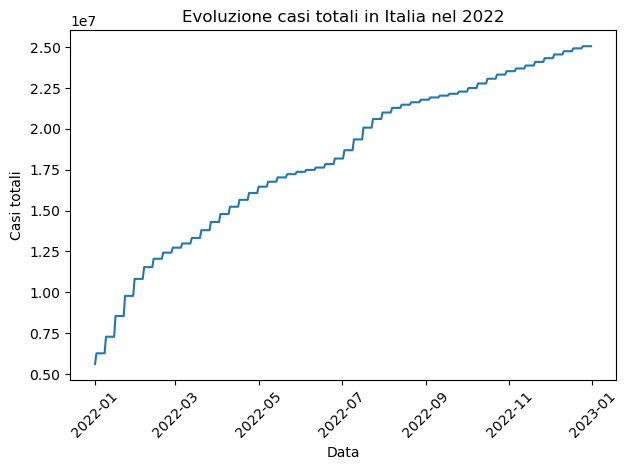

In [6]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con un grafico adeguato l'evoluzione dei casi totali rispetto alla data.
import seaborn as sns
import matplotlib.pyplot as plt

#convertiamo i dati 'date' in formato 'datetime'
df['date'] = pd.to_datetime(df['date'])

#convertiamo i valori infiniti in NaN come proposto dal FutureWarning
pd.option_context('mode.use_inf_as_na', True)

#filtriamo i dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

#creiamo il grafico
sns.lineplot(data=df_italia_2022, x='date', y='total_cases')
plt.title('Evoluzione casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

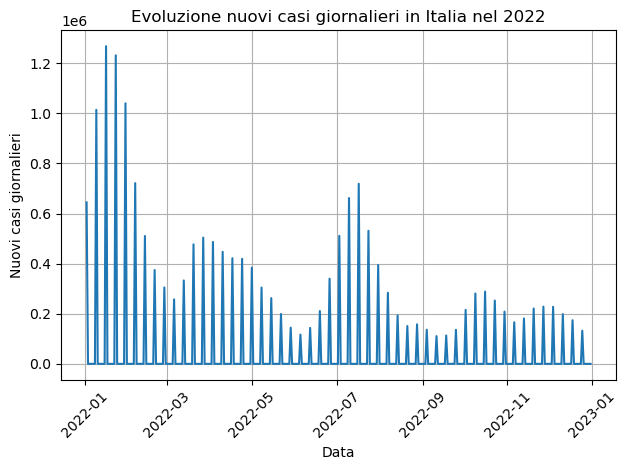

In [7]:
#Mostrare con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario) 

#convertiamo la colonna 'date' in formato datetime
df['date'] = pd.to_datetime(df['date'])

#filtriamo i dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

#calcoliamo i nuovi casi giornalieri limitandoci ai valori positivi
df_italia_2022 = df_italia_2022.copy()
df_italia_2022['nuovi_casi'] = df_italia_2022['new_cases'].diff().clip(lower=0)

#creiamo il grafico
plt.plot(df_italia_2022['date'], df_italia_2022['nuovi_casi'], linestyle='-')
plt.title('Evoluzione nuovi casi giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi giornalieri')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

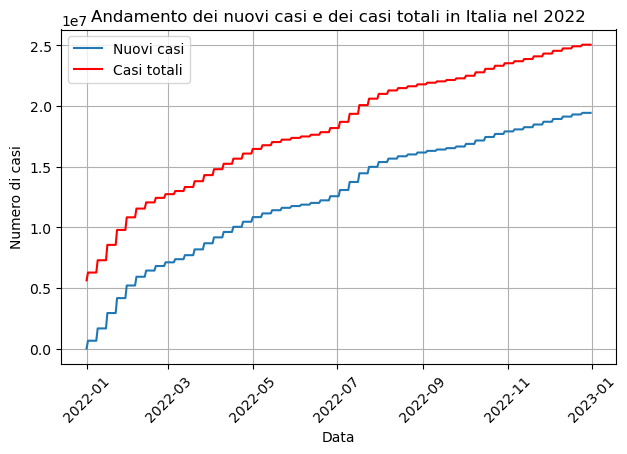

In [8]:
#Mostrare un grafico per l'andamento della somma cumulativa nuovi casi del 2022 e commentare se ci sono similarità con l'andamento del numero dei casi totali

#convertiamo la colonna date in formato datetime
df['date'] = pd.to_datetime(df['date'])

#filtriamo i dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

#calcoliamo la somma cumulativa dei nuovi casi
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()
df_italia_2022['nuovi_casi_cumulativi'] = df_italia_2022['new_cases'].cumsum()

#creiamo grafico
#linea per la somma cumulativa dei nuovi casi
plt.plot(df_italia_2022['date'], df_italia_2022['nuovi_casi_cumulativi'], label='Nuovi casi', linestyle='-')

#linea per il numero totale di casi
plt.plot(df_italia_2022['date'], df_italia_2022['total_cases'], label='Casi totali', linestyle='-', color='red')

plt.title('Andamento dei nuovi casi e dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#è evidente che l'andamento dei nuovi casi cumulativi e dei casi totali in italia sia similare. Questo comportmanento può avvenire poichè ogni giorno i casi nuovi vengono sommati risultando quindi uguali ai casi totali registrati.

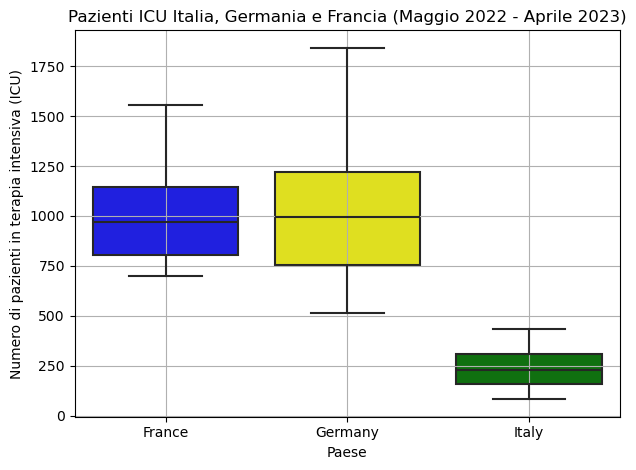

In [9]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

#selezioniamo dal dataset i dati geografici e temporali richiesti
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'

df_selected = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

#filtriamo i dati relativi ai pazienti in terapia intensiva
df_icu = df_selected[['location', 'date', 'icu_patients']]

#creiamo un dizionario per impostare i colori personalizzati
colors = {'Italy': 'green', 'Germany': 'yellow', 'France': 'blue'}

#creiamo un boxplot per visualizzare la distribuzione dei pazienti in terapia intensiva per i tre paesi
sns.boxplot(x='location', y='icu_patients', data=df_icu, palette=colors)
plt.title('Pazienti ICU Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Paese')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.grid(True)
plt.tight_layout()

plt.show()

#si chiede di scrivere un breve commento sull'analisi svolta

#La rappresentazione visiva permette di individuare velocemente la differenza di distribuzione dei pazienti in ICU tra i Paesi selezionati in un periodo di tempo preciso.
#Il boxplot della Germania presenta un'ampiezza maggiore rispetto agli altri, probabilmente a causa di una maggiore eterogeneità dei dati (indicata anche dalla linea degli estremi più lunga).
#Il boxplot relativo all'Italia presenta meno differenze tra primo e terzo quartile, risultando quindi più piccolo e compatto rispetto agli altri due. Questo caso potrebbe essere indicativo sulla natura dei dati raccolti, più compatti e omogenei rispetto agli altri due Paesi. 

In [10]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

#selezioniamo solo Italia, Germania, Francia, Spagna per il 2023
countries_of_interest = ['Italy', 'Germany', 'France', 'Spain']
year_of_interest = '2023'

df_filtered = df[(df['location'].isin(countries_of_interest)) & (df['date'].dt.year == int(year_of_interest))]

#calcoliamo la somma dei pazienti ospitalizzati per ogni nazione
sum_hosp_patients_by_country = df_filtered.groupby('location')['hosp_patients'].sum()

#verifichiamo la presenza di dati nulli nella colonna 'hosp_patients'
null_values_count = df_filtered['hosp_patients'].isnull().sum()

if null_values_count > 0:
    print("Sono presenti dati nulli")
else:
    print("Non sono presenti dati nulli")
    
print(f"Numero di dati nulli: {null_values_count}")

#proviamo a sostituire i dati nulli con 0
null_values_count = df_filtered['hosp_patients'].isnull().sum()

#stampiamo la somma dei pazienti ospitalizzati per ogni nazione
print("\nSomma dei pazienti ospitalizzati per nazione nel 2023:")
print(sum_hosp_patients_by_country)

#la gestione dei dati nulli in questo caso può essere risolta con la sostituzione dei valori NaN in 0

Sono presenti dati nulli
Numero di dati nulli: 843

Somma dei pazienti ospitalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [11]:
#Proviamo ad esplorare solo la colonna relativa alla Germania per capire come mai risulta somma 0
germany_data = df_filtered[df_filtered['location'] == 'Germany']

hp_germany = germany_data['hosp_patients']

print("Dati HP per la Germania:")
print(hp_germany)

count_hp_germany = germany_data['hosp_patients'].count()
print(f"Dati non nulli HP per la Germania: {count_hp_germany}")

#la colonna relativa alla Germania non presenta dati utilizzabili per l'analisi

Dati HP per la Germania:
126832   NaN
126833   NaN
126834   NaN
126835   NaN
126836   NaN
          ..
127192   NaN
127193   NaN
127194   NaN
127195   NaN
127196   NaN
Name: hosp_patients, Length: 365, dtype: float64
Dati non nulli HP per la Germania: 0
